<i>[Bhanu Pratap Singh](https://www.linkedin.com/in/bpst/), DS C33</i>

---
# Housing Price Prediction - Advance Regression

---
## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

In [1]:
# Importing required packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statistic
from scipy import stats
from scipy.stats import norm, skew 

# Train-Test Split
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Scores
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Importing display related package to extend cell size
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))

### Data Preperation

In [5]:
# Importing dataset
housing = pd.read_csv('train.csv')
housing.shape

(1460, 81)

In [6]:
# View top 5 rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dropping `Id` feature as it does not impact our prediction

In [7]:
# Dropping Id
housing.drop(columns=['Id'], axis=1, inplace=True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Check column info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# View statistical details
housing.describe([.05, .25, .5, .75, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.0500

### Missing Value Treatment

In [10]:
# Check percentage of missing values
round((housing.isnull().sum()*100/housing.shape[0]).sort_values(ascending=False), 2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

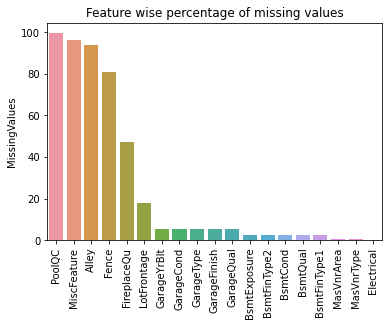

In [11]:
# Visualize missing values
missing_val_df = pd.DataFrame(round((housing.isnull().sum()*100/housing.shape[0]).sort_values(ascending=False), 2))
missing_val_df.rename(columns={0:'MissingValues'}, inplace=True)
missing_val_df = missing_val_df[missing_val_df.MissingValues > 0.0]
sns.barplot(y=missing_val_df.MissingValues, x=missing_val_df.index).set_title('Feature wise percentage of missing values')
plt.xticks(rotation=90)
plt.show()

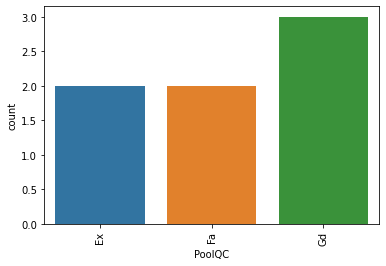

In [12]:
# Plotting count plot
sns.countplot(x='PoolQC', data=housing)
plt.xticks(rotation=90)
plt.show()

As per data description,

**PoolQC**: Pool quality
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* NA: No Pool

Very clearly NA means `No Pool`, so we can safely assume a missing values of `None`

In [13]:
# Filling missing value with "None"
housing.PoolQC.fillna('None', inplace=True)

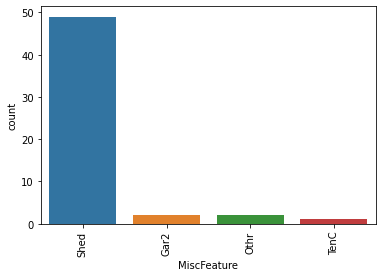

In [14]:
# Plotting count plot
sns.countplot(x='MiscFeature', data=housing)
plt.xticks(rotation=90)
plt.show()

As per data description,

**MiscFeature**: Miscellaneous feature not covered in other categories		
* Elev:	Elevator
* Gar2:	2nd Garage (if not described in garage section)
* Othr:	Other
* Shed:	Shed (over 100 SF)
* TenC:	Tennis Court
* NA:	None

Clearly NA means not having any miscellaneous feature, so we can safely assume this value to be `None`

In [15]:
# Filling missing value with "None"
housing.MiscFeature.fillna('None', inplace=True)

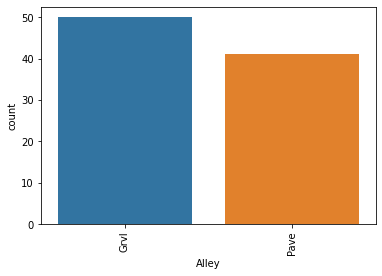

In [16]:
# Plotting count plot
sns.countplot(x='Alley', data=housing)
plt.xticks(rotation=90)
plt.show()

As per data description,

**Alley**: Type of alley access to property
* Grvl: Gravel
* Pave: Paved
* NA:   No alley access
    
Clearly NA value means lack of alley, so we can safely assume this value to be `None`

In [17]:
# Filling missing value with "None"
housing.Alley.fillna('None', inplace=True)

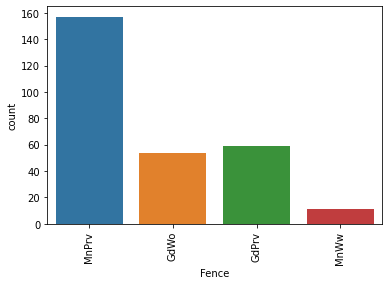

In [18]:
# Plotting count plot
sns.countplot(x='Fence', data=housing)
plt.xticks(rotation=90)
plt.show()

As per data description,

**Fence**: Fence quality
* GdPrv: Good Privacy
* MnPrv: Minimum Privacy
* GdWo:  Good Wood
* MnWw:  Minimum Wood/Wire
* NA:    No Fence
    
Clearly NA value means lack of fence, so we can safely assume this value to be `None`

In [19]:
# Filling missing value with "None"
housing.Fence.fillna('None', inplace=True)

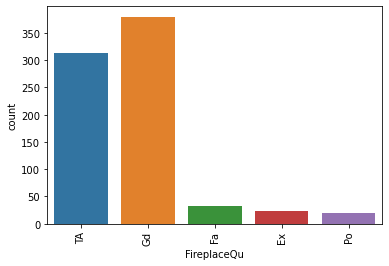

In [20]:
# Plotting count plot
sns.countplot(x='FireplaceQu', data=housing)
plt.xticks(rotation=90)
plt.show()

As per data description,

**FireplaceQu**: Fireplace quality
* Ex: Excellent - Exceptional Masonry Fireplace
* Gd: Good - Masonry Fireplace in main level
* TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa: Fair - Prefabricated Fireplace in basement
* Po: Poor - Ben Franklin Stove
* NA: No Fireplace
    
Clearly NA value means lack of fireplace, so we can safely assume this value to be `None`

In [21]:
# Filling missing value with "None"
housing.FireplaceQu.fillna('None', inplace=True)

As per data description,

**LotFrontage**: Linear feet of street connected to property

For filling missing values with median we assume all neighborhood contain similar houses

In [22]:
# Filling missing values
housing.LotFrontage = housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

As per data description,

**GarageYrBlt**: Year garage was built
    
We will fill missing values with `0`

In [23]:
# Filling missing value with "0"
housing.GarageYrBlt.fillna(0, inplace=True)

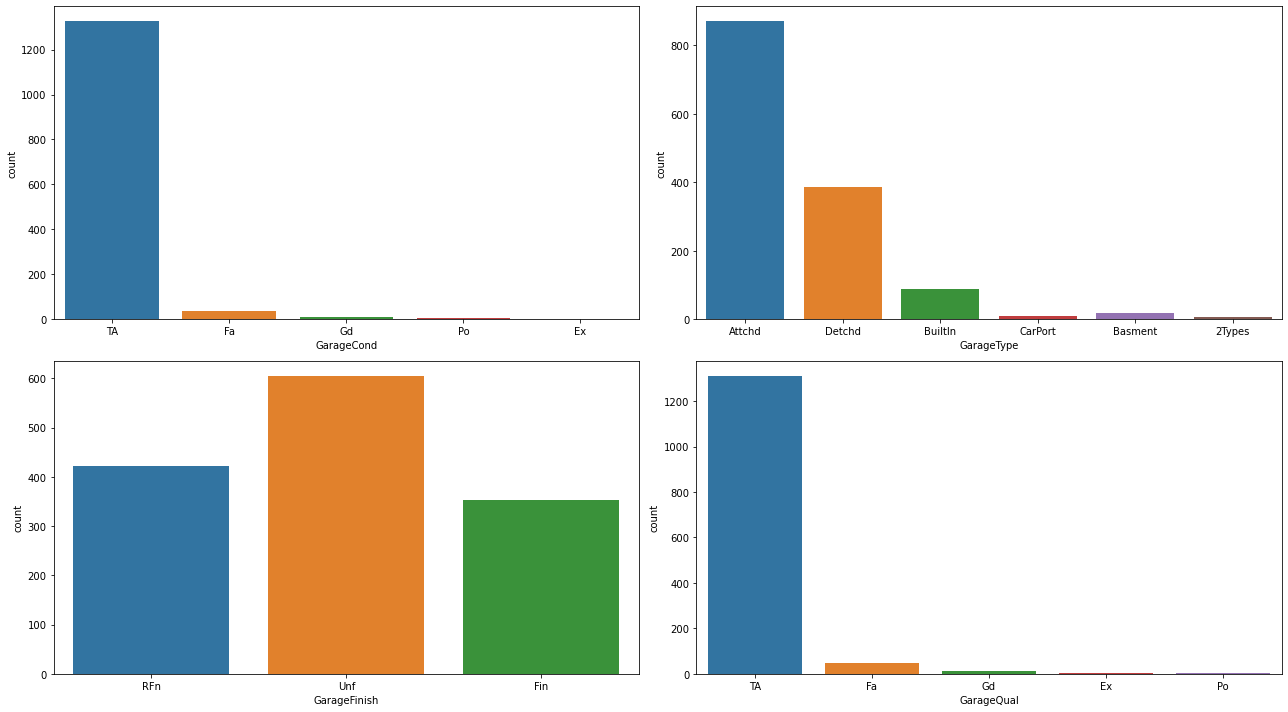

In [24]:
# Plotting count plots
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='GarageCond', data=housing)

plt.subplot(2, 2, 2)
sns.countplot(x='GarageType', data=housing)

plt.subplot(2, 2, 3)
sns.countplot(x='GarageFinish', data=housing)

plt.subplot(2, 2, 4)
sns.countplot(x='GarageQual', data=housing)

plt.tight_layout()
plt.show()

As per data description,

**GarageCond**: Garage condition
* Ex: Excellent
* Gd: Good
* TA: Typical/Average
* Fa: Fair
* Po: Poor
* NA: No Garage
    
and for,

**GarageType**: Garage location
* 2Types:  More than one type of garage
* Attchd:  Attached to home
* Basment: Basement Garage
* BuiltIn: Built-In (Garage part of house - typically has room above garage)
* CarPort: Car Port
* Detchd:  Detached from home
* NA:      No Garage
    
and for,

**GarageFinish**: Interior finish of the garage
* Fin: Finished
* RFn: Rough Finished
* Unf: Unfinished
* NA:  No Garage
 
and for,

**GarageQual**: Garage quality
* Ex: Excellent
* Gd: Good
* TA: Typical/Average
* Fa: Fair
* Po: Poor
* NA: No Garage

Clearly NA value for all these features means lack of garage, so we can safely assume this value to be `None`

In [25]:
# Filling missing value with "None"
housing.GarageCond.fillna('None', inplace=True)
housing.GarageType.fillna('None', inplace=True)
housing.GarageFinish.fillna('None', inplace=True)
housing.GarageQual.fillna('None', inplace=True)

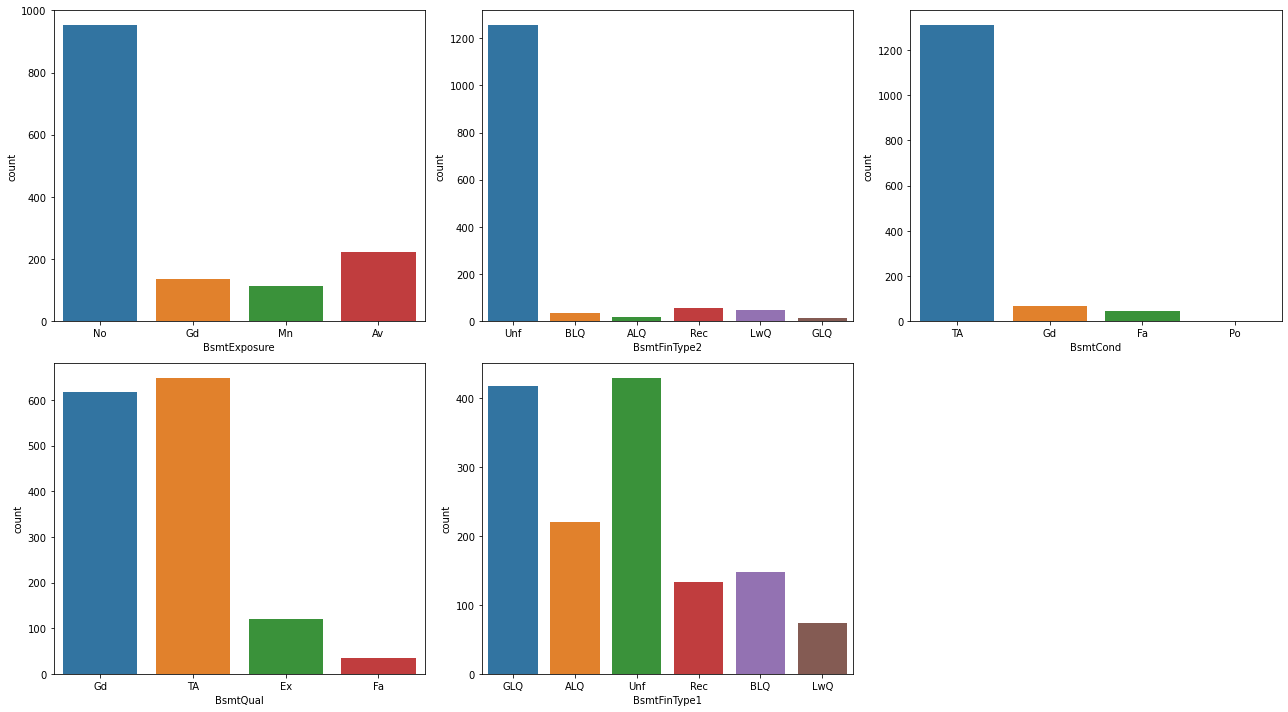

In [26]:
# Plotting count plots
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='BsmtExposure', data=housing)

plt.subplot(2, 3, 2)
sns.countplot(x='BsmtFinType2', data=housing)

plt.subplot(2, 3, 3)
sns.countplot(x='BsmtCond', data=housing)

plt.subplot(2, 3, 4)
sns.countplot(x='BsmtQual', data=housing)

plt.subplot(2, 3, 5)
sns.countplot(x='BsmtFinType1', data=housing)

plt.tight_layout()
plt.show()

As per data description,

**BsmtExposure**: Refers to walkout or garden level walls
* Gd: Good Exposure
* Av: Average Exposure (split levels or foyers typically score average or above)	
* Mn: Mimimum Exposure
* No: No Exposure
* NA: No Basement
        
and for,   
        
**BsmtFinType2**: Rating of basement finished area (if multiple types)
* GLQ: Good Living Quarters
* ALQ: Average Living Quarters
* BLQ: Below Average Living Quarters	
* Rec: Average Rec Room
* LwQ: Low Quality
* Unf: Unfinshed
* NA:  No Basement    

and for,
        
**BsmtCond**: Evaluates the general condition of the basement
* Ex: Excellent
* Gd: Good
* TA: Typical - slight dampness allowed
* Fa: Fair - dampness or some cracking or settling
* Po: Poor - Severe cracking, settling, or wetness
* NA: No Basement
        
and for,     
        
**BsmtQual**: Evaluates the height of the basement
* Ex: Excellent (100+ inches)	
* Gd: Good (90-99 inches)
* TA: Typical (80-89 inches)
* Fa: Fair (70-79 inches)
* Po: Poor (<70 inches
* NA: No Basement
                  
and for,     
            
**BsmtFinType1**: Rating of basement finished area
* GLQ: Good Living Quarters
* ALQ: Average Living Quarters
* BLQ: Below Average Living Quarters	
* Rec: Average Rec Room
* LwQ: Low Quality
* Unf: Unfinshed
* NA:  No Basement
       
Clearly NA value for all these features means lack of basement, so we can safely assume this value to be `None`

In [27]:
# Filling missing value with "None"
housing.BsmtExposure.fillna('None', inplace=True)
housing.BsmtFinType2.fillna('None', inplace=True)
housing.BsmtCond.fillna('None', inplace=True)
housing.BsmtQual.fillna('None', inplace=True)
housing.BsmtFinType1.fillna('None', inplace=True)

As per data description,

**MasVnrArea**: Masonry veneer area in square feet
    
We will fill missing values with `0`

In [28]:
# Filling missing value with "0"
housing.MasVnrArea.fillna(0, inplace=True)

As per data description,

**MasVnrType**: Masonry veneer type
* BrkCmn:  Brick Common
* BrkFace: Brick Face
* CBlock:  Cinder Block
* None:    None
* Stone:   Stone
    
Clearly lets impute missing values with `None`

In [29]:
# Filling missing value with "None"
housing.MasVnrType.fillna('None', inplace=True)

In [30]:
# Check missing values
housing[housing.Electrical.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [31]:
# Filling missing value with "mode" i.e "SBrkr"
housing.Electrical.fillna(housing.Electrical.mode()[0], inplace=True)

In [32]:
# Check percentage of missing values
round((housing.isnull().sum()*100/housing.shape[0]).sort_values(ascending=False), 2).head(10)

MSSubClass      0.0
MSZoning        0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

## EDA - Exploratory Data Analysis

In [33]:
# Get numeric features
numeric_features = [col for col in housing.columns if housing[col].dtypes != 'O']
len(numeric_features)

37

In [34]:
# Get categorical features
categorical_features = [col for col in housing.columns if housing[col].dtypes == 'O']
len(categorical_features)

43

#### Analyse target feature i.e. house sale price over the time properties sold

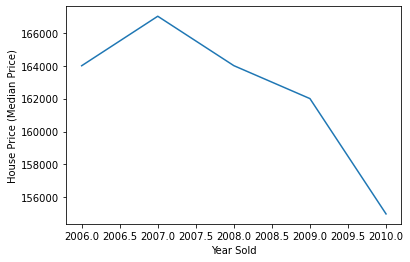

In [35]:
# Check if house median sale prices changes with year sold
housing.YrSold = housing.YrSold.apply(lambda x: int(x))
housing.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price (Median Price)')
plt.show()

Clearly there is significant reduction in average house price starting from year 2007. Now let's analyse year realted features.

In [36]:
# Getting features realted to year
year_features = [col for col in numeric_features if 'y' in col.lower()]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

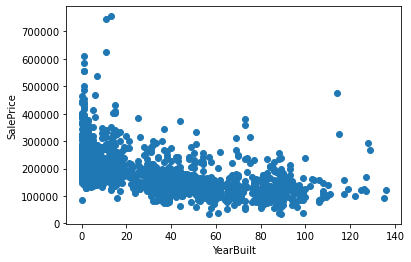

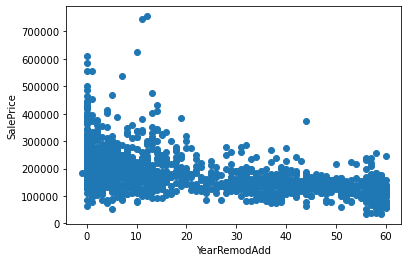

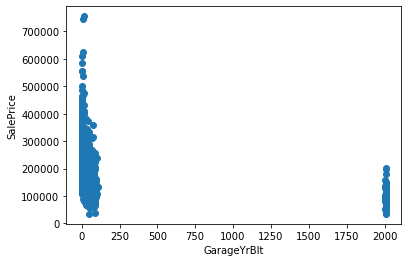

In [37]:
# Analyse year features - plotting scatterplot
for feature in year_features[:-1]:
    temp_df = housing.copy()
    temp_df[feature] = temp_df['YrSold'] - temp_df[feature]
    plt.scatter(temp_df[feature], temp_df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

Clearly new buildings/properties are sold at higher price as compared to older buildings/properties.

#### Analyse Numeric Features

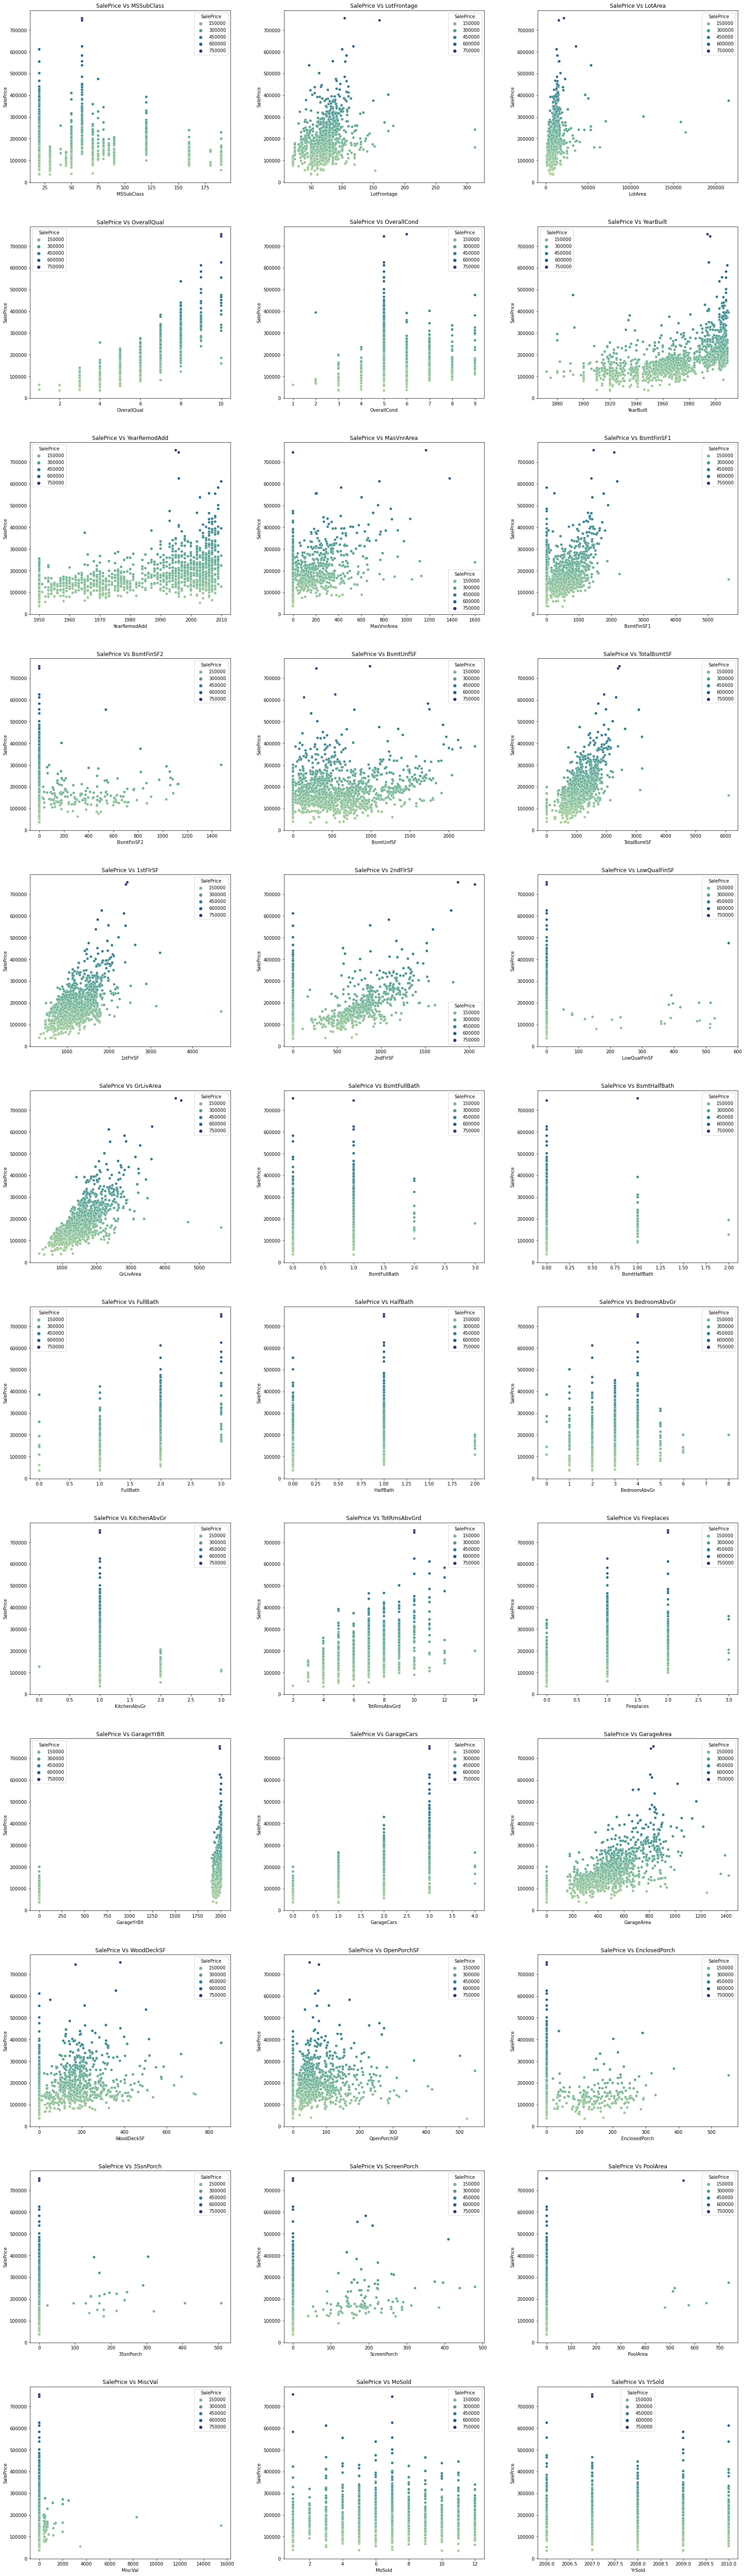

In [38]:
# Analyse numeric predictors with target feature
fig, ax = plt.subplots(12, 3, figsize=(24, 80))
for row, column in enumerate([feature for feature in numeric_features if feature != 'SalePrice']):
    index_row = row//3
    index_col = row%3
    sns.scatterplot(data=housing, x=column, y='SalePrice', hue='SalePrice', ax=ax[index_row][index_col], palette='crest')
    ax[index_row][index_col].set_xlabel(column)
    ax[index_row][index_col].set(title=f'SalePrice Vs {str(column)}')
    fig.tight_layout(pad=5.0)

**Key Insights**
* New building/properties are sold at higher price than older building/properties
* Month sold has no significant effect on house sale price

Few numeric features which should be handled as categorical variables,
* OverallQual
* OverallCond
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath
* BedroomAbvGr
* KitchenAbrGr
* Fireplaces
* MoSold
* YrSold

#### Analyse Categorical Features

In [39]:
# Function to plot boxplot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

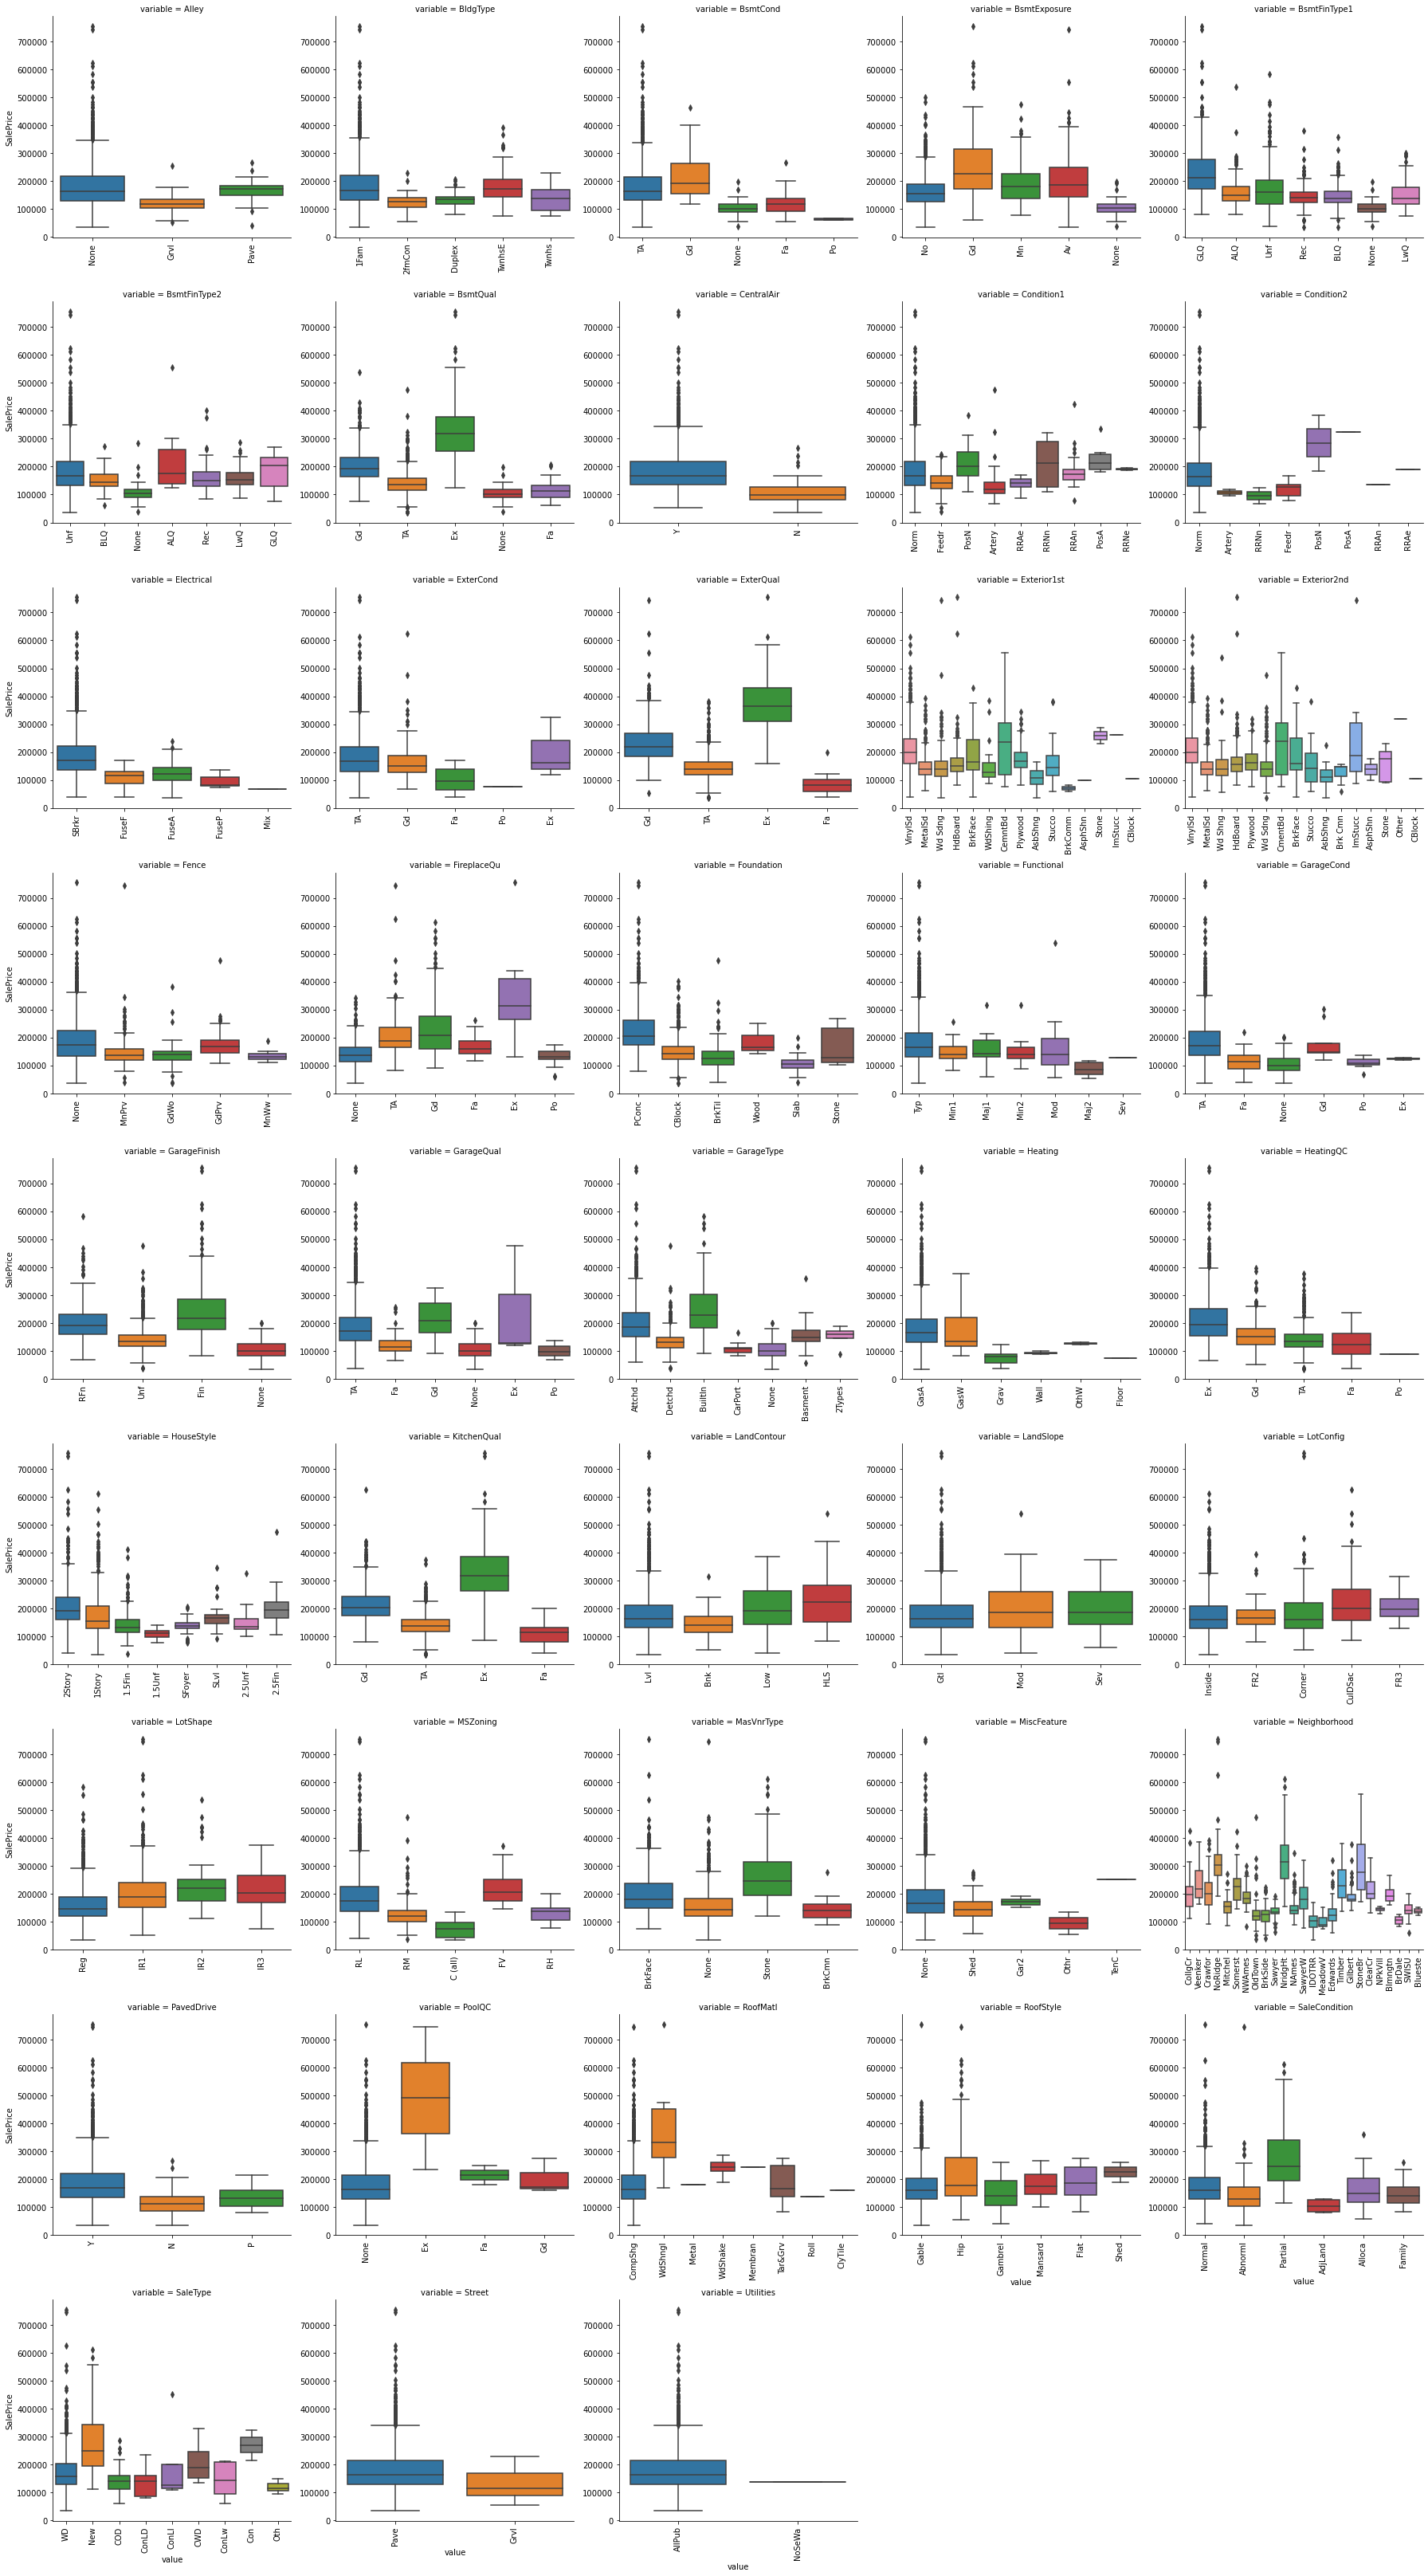

In [40]:
# Analyse categorical variables
data = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(housing[categorical_features]))
grid = sns.FacetGrid(data, col='variable', col_wrap=5, sharex=False, sharey=False, size=5)
grid.map(boxplot, 'value', 'SalePrice');

Clearly there are few outliers we need to handle them.

**Key Insights**
* Building with good and excellent basement quality are sold at higher price compared to others
* Building with good and excellent garage quality are sold at higher price compared to others

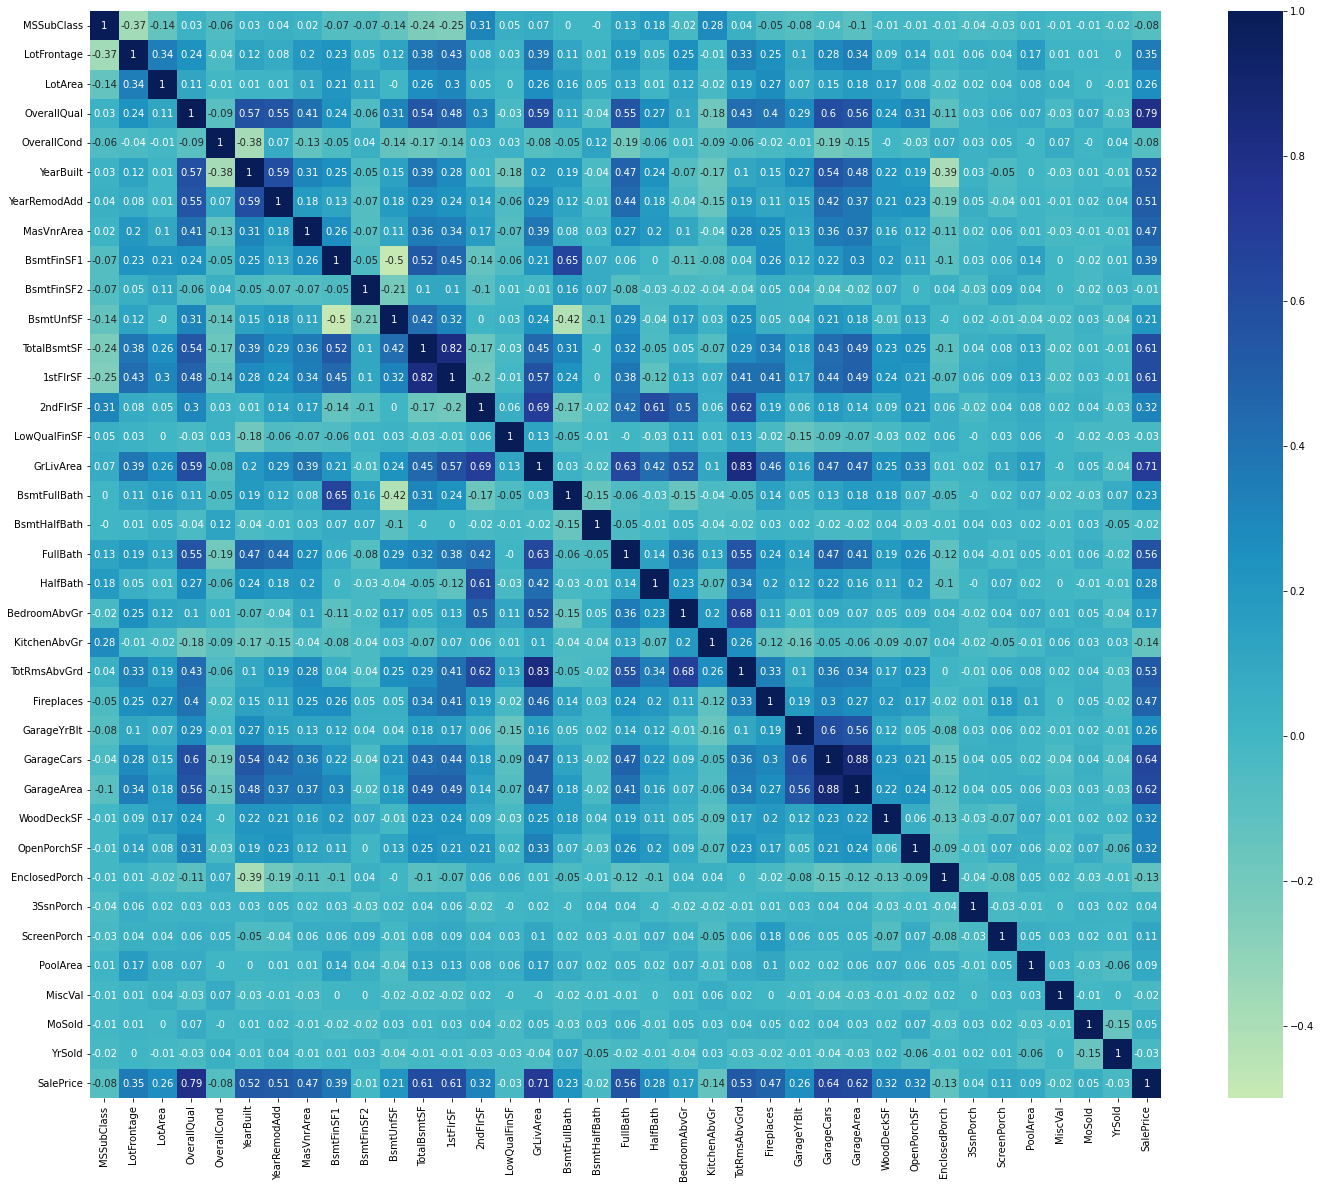

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(24, 20))
sns.heatmap(round(housing[numeric_features].corr(),2), annot=True, cmap='YlGnBu', center=0)
plt.show()

Clearly there are few highly correlated feature, we need to handle them.

In [42]:
# Get top 15 features
corr_mat = housing[numeric_features].corr()
top_15_features = corr_mat.nlargest(15, 'SalePrice')['SalePrice'].index
top_15_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage'],
      dtype='object')

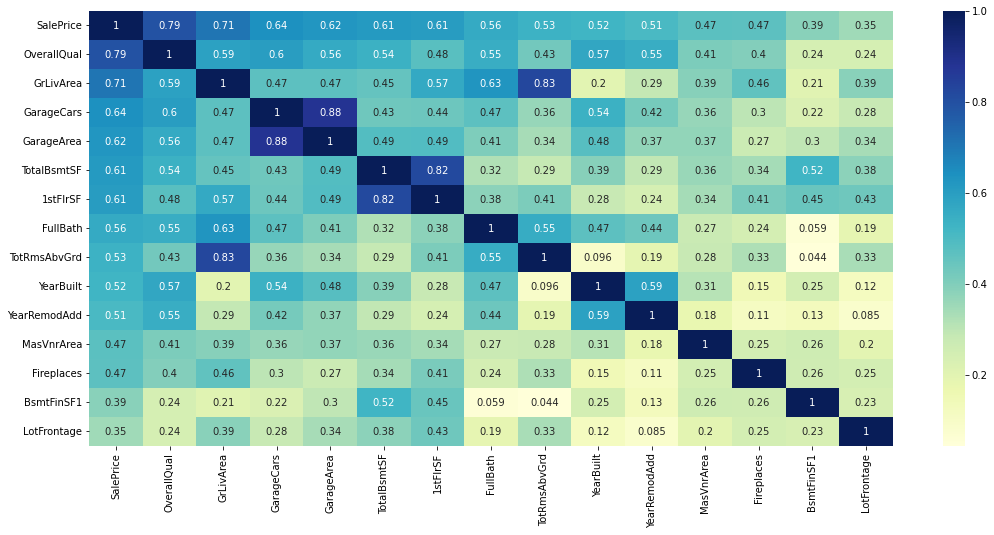

In [43]:
# Plot correlation headmap
plt.figure(figsize=(18, 8))
sns.heatmap(housing[top_15_features].corr(), annot=True, cmap='YlGnBu')
plt.show()

Clearly we can see below mentioned pair of features are highly correlated,
* TotRmsAbvGrd and GrLivArea - 0.83 
* GarageArea and GarageCars - 0.88
* 1stFlrSF and TotalBsmtSF - 0.82

We need to drop one feature from each co-linear pair, let's plot scatter plot to choose the features

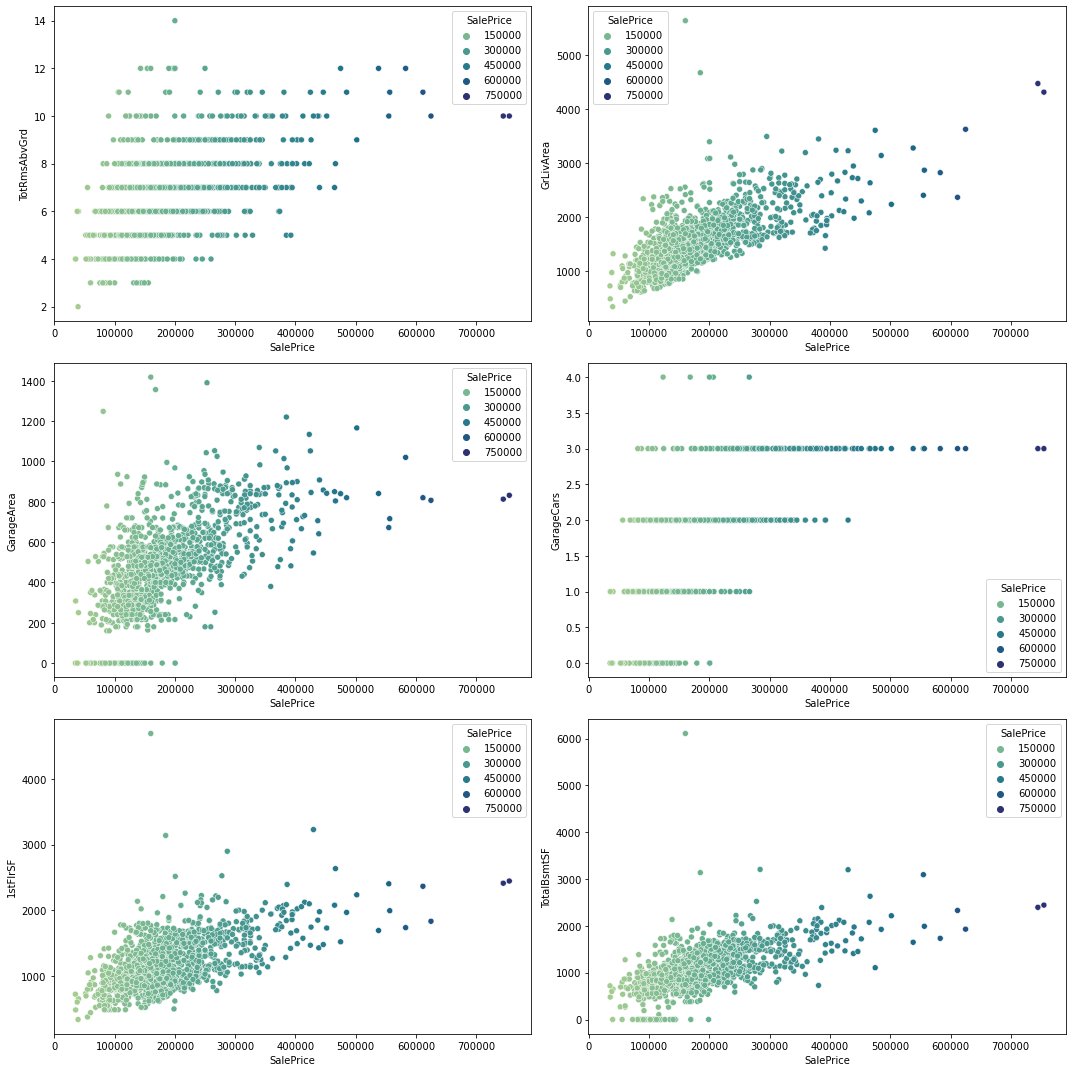

In [44]:
# Create scatter plot 
fig, ax = plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(data=housing, x='SalePrice', y='TotRmsAbvGrd', hue='SalePrice', ax=ax[0][0], palette='crest')
sns.scatterplot(data=housing, x='SalePrice', y='GrLivArea', hue='SalePrice', ax=ax[0][1], palette='crest')

sns.scatterplot(data=housing, x='SalePrice', y='GarageArea', hue='SalePrice', ax=ax[1][0], palette='crest')
sns.scatterplot(data=housing, x='SalePrice', y='GarageCars', hue='SalePrice', ax=ax[1][1], palette='crest')

sns.scatterplot(data=housing, x='SalePrice', y='1stFlrSF', hue='SalePrice', ax=ax[2][0], palette='crest')
sns.scatterplot(data=housing, x='SalePrice', y='TotalBsmtSF', hue='SalePrice', ax=ax[2][1], palette='crest')

plt.tight_layout()
plt.show()

Clearly, i will keep `GrLivArea, GarageArea and TotalBsmtSF`

In [45]:
# Dropping features
housing.drop(columns=['TotRmsAbvGrd','GarageCars','1stFlrSF'], axis=1, inplace=True)
housing.shape

(1460, 77)

### Feature Engineering

In [46]:
# Helper function to get list of redundent features
def get_redundent_features(df):
    features = []
    for column in df.columns:
        counts = df[column].value_counts()
        max_count = counts.iloc[0]
        if (max_count/df.shape[0]) * 100 > 99:
            features.append(column)
    return features

In [47]:
# Get list of redundant features
redundent_features = get_redundent_features(housing)
redundent_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [48]:
# Dropping redundant features
housing.drop(columns=redundent_features, axis=1, inplace=True)
housing.shape

(1460, 73)

In [49]:
# Create new derived features
housing['BuildingAge'] = housing.YrSold - housing.YearBuilt
housing['GarageAge'] = housing.YrSold - housing.GarageYrBlt
housing['BuildingRemodAge'] = housing.YrSold - housing.YearRemodAdd

In [50]:
# Dropping original features
housing.drop(columns=['YearBuilt','GarageYrBlt','YearRemodAdd'], axis=1, inplace=True)
housing.shape

(1460, 73)

In [51]:
# Convert numeric to categorical
housing.MSSubClass = housing.MSSubClass.astype('str')
housing.YrSold = housing.YrSold.astype('str')
housing.MoSold = housing.MoSold.astype('str')

In [52]:
# Get list of basement related features
[col for col in numeric_features if 'Bsmt' in col]

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

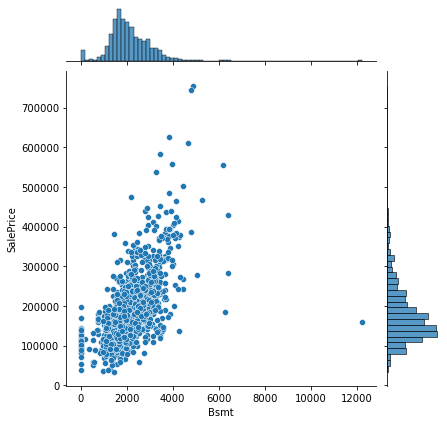

In [53]:
# Create new feature
housing['Bsmt'] = housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['BsmtUnfSF'] + housing['TotalBsmtSF']
sns.jointplot(housing.Bsmt, housing.SalePrice)
plt.show()

In [54]:
# Dropping original features
housing.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], axis=1, inplace=True)

In [55]:
# Get list of basement related features
[col for col in numeric_features if 'Porch' in col]

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

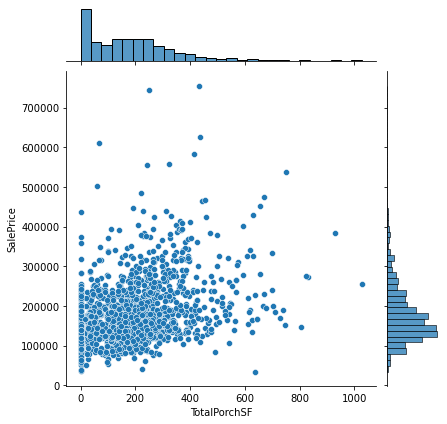

In [56]:
# Create drived feature
housing['TotalPorchSF'] = housing['OpenPorchSF'] + housing['EnclosedPorch'] + housing['3SsnPorch'] + housing['ScreenPorch'] + housing['WoodDeckSF']
sns.jointplot(housing.TotalPorchSF, housing.SalePrice)
plt.show()

In [57]:
# Dropping original features
housing.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1, inplace=True)
housing.shape

(1460, 66)

In [58]:
# Get list of basement related features
[col for col in numeric_features if 'Bath' in col]

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

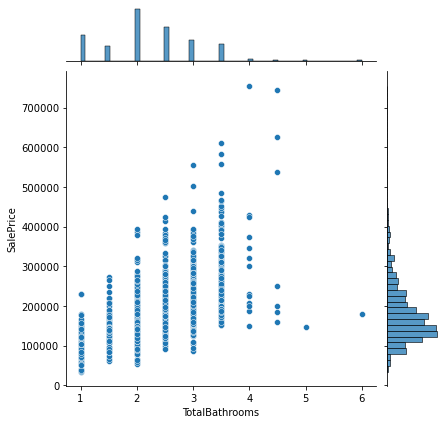

In [59]:
# Create drived feature
housing['TotalBathrooms'] = housing.FullBath + (0.5 * housing.HalfBath) + housing.BsmtFullBath + (0.5 * housing.BsmtHalfBath)
sns.jointplot(housing.TotalBathrooms, housing.SalePrice)
plt.show()

In [60]:
# Dropping original features
housing.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)
housing.shape

(1460, 63)

In [61]:
# Cobvert to categorical
housing.TotalBathrooms = housing.TotalBathrooms.astype('str')
housing.OverallCond = housing.OverallCond.astype('str')

### Outlier Treatment

In [62]:
def handle_outliers(df, features=None):
    if features == None:
        features = [col for col in df.columns if df[col].dtypes != 'O']
    for feature in features:
        Q1 = df[feature].quantile(.25)
        Q3 = df[feature].quantile(.97)
        IQR = Q3 - Q1
        df =  df[(df[feature] >= (Q1 - (1.5 * IQR))) & (df[feature] <= (Q3 + (1.5 * IQR)))]
    return df

In [63]:
# Treat outliers
housing = handle_outliers(housing)
housing.shape

(1404, 63)

Clearly 56 outliers have been removed

### One-Hot Encoding

In [64]:
# Get categorical features
categorical_features = [col for col in housing.columns if housing[col].dtypes == 'O']

In [65]:
# Get dummy features
dummy_features = pd.get_dummies(housing[categorical_features], drop_first=True)
dummy_features.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Shed,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBathrooms_

In [66]:
# Merge and drop original features
housing = pd.concat([housing, dummy_features], axis=1)
housing.drop(categorical_features, axis=1, inplace=True)
housing.shape

(1404, 277)

### Analyse Target Feature - SalePrice

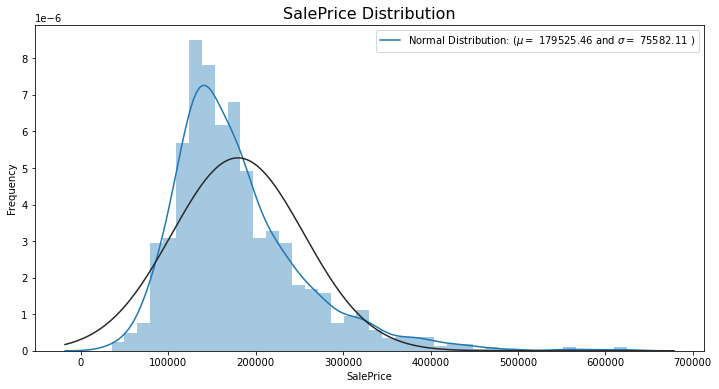

In [67]:
# Plotting displot for target feature
plt.figure(figsize=(12, 6))
sns.distplot(housing.SalePrice, fit=norm)
(mu, sigma) = norm.fit(housing.SalePrice)
plt.legend(['Normal Distribution: ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', fontsize=16)
plt.show()

Clearly our target feature is skewed, let's fix this

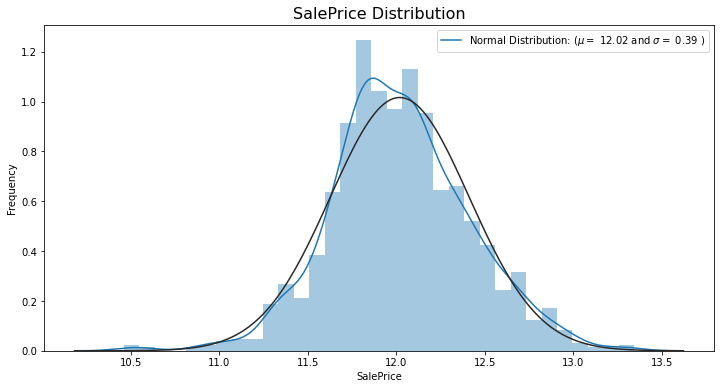

In [68]:
# Fix positive skewness in the target feature
housing.SalePrice = np.log1p(housing.SalePrice)
plt.figure(figsize=(12, 6))
sns.distplot(housing.SalePrice, fit=norm)
(mu, sigma) = norm.fit(housing.SalePrice)
plt.legend(['Normal Distribution: ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', fontsize=16)
plt.show()

### Train-Test Split

In [69]:
# Train Test Split
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(982, 277)
(422, 277)


### Scaling Features

In [70]:
# Create standard scaler instance
scaler = StandardScaler()

In [71]:
list(housing.describe().columns)[:18]

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'MiscVal',
 'SalePrice',
 'BuildingAge',
 'GarageAge',
 'BuildingRemodAge',
 'Bsmt',
 'TotalPorchSF']

In [72]:
# Scale Train Test sets
features_scale = list(housing.describe().columns)[:18]
df_train[features_scale] = scaler.fit_transform(df_train[features_scale])
df_test[features_scale] = scaler.transform(df_test[features_scale])

#### Get Dependent and Independent Features

In [73]:
# For train set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [74]:
# For test set
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building
#### Using RFE to select features

In [75]:
# Define estimator
lm = LinearRegression()

In [76]:
# Fit model
lm.fit(X_train, y_train)

LinearRegression()

In [77]:
# Running RFE - 50 features
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [78]:
# View selected features
rfe_features = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_features.columns = ['Features','Status','Ranking']
rfe_features.sort_values(by='Ranking', ascending=True).head(51)

,Features,Status,Ranking
31,MSZoning_FV,True,1
30,MSSubClass_90,True,1
69,Neighborhood_Somerst,True,1
32,MSZoning_RH,True,1
33,MSZoning_RL,True,1
34,MSZoning_RM,True,1
154,ExterCond_Po,True,1
151,ExterQual_TA,True,1
150,ExterQual_Gd,True,1
149,ExterQual_Fa,True,1


In [79]:
# Filter features selected based on RFE
X_train = X_train[list(rfe_features[rfe_features.Ranking == 1]['Features'])]
X_test = X_test[list(rfe_features[rfe_features.Ranking == 1]['Features'])]
print(X_train.shape)
print(X_test.shape)

(982, 50)
(422, 50)


## Option 1: Build Model using LASSO

In [80]:
# Building model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [81]:
# Get prediction for train set
y_train_pred = lasso_model.predict(X_train)
r2_score(y_train, y_train_pred)

0.5856459334039921

In [82]:
# Get prediction for test set
y_test_pred  = lasso_model.predict(X_test)
r2_score(y_test, y_test_pred)

0.6172138022430439

### Hyperparameter Tunning - LASSO

In [83]:
# Create list of alpha values
hyper_param = {'alpha':[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}

In [84]:
# Create model
model_lasso = Lasso()
model_cv_lasso = GridSearchCV(estimator = model_lasso, 
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# Checking the best parameter (Alpha Value)
model_cv_lasso.best_params_

{'alpha': 0.001}

In [86]:
# Store grid search results in dataframe
lasso_cv_results_df = pd.DataFrame(model_cv_lasso.cv_results_)
lasso_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003692,3.754288e-04,0.001629,5.079799e-04,0.001,{'alpha': 0.001},0.773537,0.761590,0.782929,0.788924,0.833025,0.788001,0.024333,1,0.837260,0.832266,0.834937,0.839996,0.829568,0.834806,0.003657
1,0.002201,3.993992e-04,0.001000,6.675720e-07,0.01,{'alpha': 0.01},0.764209,0.741899,0.706333,0.764750,0.805539,0.756546,0.032442,2,0.766018,0.775367,0.776408,0.772748,0.761684,0.770445,0.005682
2,0.002000,3.568323e-07,0.001200,4.000188e-04,0.1,{'alpha': 0.1},0.567479,0.568374,0.549587,0.592905,0.618227,0.579314,0.023843,3,0.587505,0.590785,0.595466,0.577074,0.578415,0.585849,0.007097
3,0.002200,4.002098e-04,0.001600,4.890845e-04,1.0,{'alpha': 1.0},-0.006527,-0.013238,-0.024699,-0.001232,-0.007499,-0.010639,0.007996,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002387,4.758909e-04,0.001245,3.866465e-04,5.0,{'alpha': 5.0},-0.006527,-0.013238,-0.024699,-0.001232,-0.007499,-0.010639,0.007996,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002312,4.065416e-04,0.001397,4.891252e-04,10.0,{'alpha': 10.0},-0.006527,-0.013238,-0.024699,-0.001232,-0.007499,-0.010639,0.007996,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.002027,5.505093e-05,0.001801,3.973961e-04,20.0,{'alpha': 20.0},-0.006527,-0.013238,-0.024699,-0.001232,-0.007499,-0.010639,0.007996,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


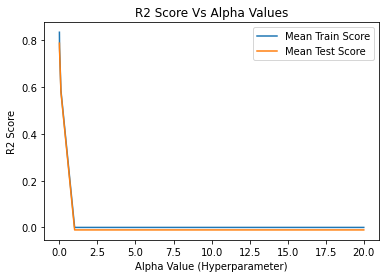

In [87]:
# Plotting alpha with r2 score
plt.plot(lasso_cv_results_df.param_alpha, lasso_cv_results_df.mean_train_score)
plt.plot(lasso_cv_results_df.param_alpha, lasso_cv_results_df.mean_test_score)
plt.xlabel('Alpha Value (Hyperparameter)')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha Values")
plt.legend(['Mean Train Score', 'Mean Test Score'], loc='best')
plt.show()

### Re-build Model with Best Alpha Value

In [88]:
# Build model with best parameter
lasso_model_best = Lasso(alpha=0.001)
lasso_model_best.fit(X_train, y_train)

Lasso(alpha=0.001)

In [89]:
# Get prediction for train set
y_train_pred = lasso_model_best.predict(X_train)
lasso_best_score_train = r2_score(y_train, y_train_pred)
lasso_best_score_train

0.8293334666778317

In [90]:
# Get prediction for test set
y_test_pred  = lasso_model_best.predict(X_test)
lasso_best_score_test = r2_score(y_test, y_test_pred)
lasso_best_score_test

0.8166020369600085

In [91]:
# RSME
mean_squared_error(y_test, y_test_pred)

0.2089383586720068

### Residual Analysis of the train data

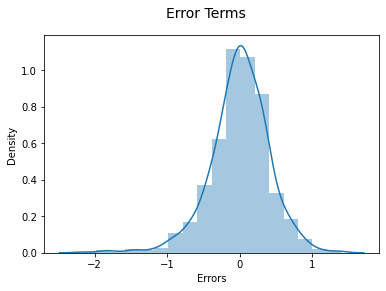

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Model Evaluation

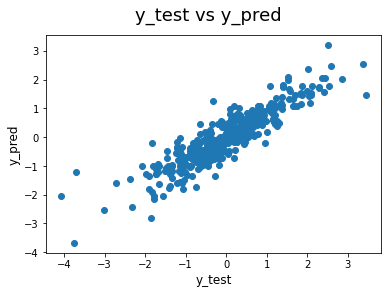

In [93]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 18)  
# X-label
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_pred', fontsize = 12)      
plt.show()

In [94]:
# View top 10 predictors
model_parameter = list(lasso_model_best.coef_)
model_parameter.insert(0, lasso_model_best.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
lasso_coefficent = pd.DataFrame(list(zip(cols, model_parameter)))
lasso_coefficent.columns = ['Feature','Coefficent']
lasso_coefficent.sort_values(by='Coefficent', ascending=False).head(10)

,Feature,Coefficent
7,BedroomAbvGr,0.611126
11,MiscVal,0.559628
12,BuildingAge,0.521722
1,LotArea,0.491968
10,GarageArea,0.469029
13,GarageAge,0.457013
32,MSZoning_RH,0.451015
6,GrLivArea,0.286974
35,Alley_None,0.257479
5,LowQualFinSF,0.218984


## Option 2: Build Model using RIDGE

In [95]:
# Create Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [96]:
# Get prediction for train set
y_train_pred = ridge_model.predict(X_train)
r2_score(y_train, y_train_pred)

0.8449316453501835

In [97]:
# Get prediction for test set
y_test_pred  = ridge_model.predict(X_test)
r2_score(y_test, y_test_pred)

0.8148430032255405

### Hyperparameter Tunning - RIDGE

In [98]:
# Create list of alpha values
hyper_param = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]}

In [99]:
# Create model
model_ridge = Ridge()
model_cv_ridge = GridSearchCV(estimator=model_ridge,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [100]:
# Checking the best parameter(Alpha Value)
model_cv_ridge.best_params_

{'alpha': 1.0}

In [101]:
# Store grid search results in dataframe
ridge_cv_results_df = pd.DataFrame(model_cv_ridge.cv_results_)
ridge_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002627,0.000556,0.001277,6.297399e-04,0.001,{'alpha': 0.001},0.734316,0.782827,0.783881,0.797472,0.830652,0.785830,0.031019,9,0.851051,0.845391,0.848886,0.853188,0.843441,0.848391,0.003573
1,0.002175,0.000362,0.001190,3.809933e-04,0.01,{'alpha': 0.01},0.736411,0.782702,0.784176,0.797391,0.830849,0.786306,0.030378,8,0.851046,0.845386,0.848882,0.853183,0.843438,0.848387,0.003573
2,0.001600,0.000490,0.001000,1.507891e-07,0.1,{'alpha': 0.1},0.753596,0.781590,0.786238,0.796680,0.832407,0.790102,0.025507,6,0.850640,0.845056,0.848520,0.852844,0.843179,0.848048,0.003538
3,0.001847,0.000434,0.001200,4.000965e-04,0.2,{'alpha': 0.2},0.766993,0.780588,0.787317,0.796073,0.833563,0.792907,0.022439,5,0.849716,0.844380,0.847779,0.852137,0.842590,0.847321,0.003469
4,0.001799,0.000400,0.001026,5.099595e-05,0.5,{'alpha': 0.5},0.789239,0.778538,0.787454,0.794952,0.835517,0.797140,0.019899,3,0.846029,0.841972,0.845134,0.849504,0.840155,0.844559,0.003257
5,0.001801,0.000400,0.001000,2.861023e-07,0.9,{'alpha': 0.9},0.801792,0.776973,0.785487,0.794193,0.836866,0.799063,0.020652,2,0.841208,0.839015,0.841872,0.846056,0.836731,0.840976,0.003115
6,0.002200,0.000400,0.001800,4.001141e-04,1.0,{'alpha': 1.0},0.803597,0.776694,0.784896,0.794062,0.837106,0.799271,0.020946,1,0.840114,0.838348,0.841135,0.845250,0.835914,0.840152,0.003104
7,0.002400,0.000490,0.001200,4.000664e-04,5.0,{'alpha': 5.0},0.808352,0.771836,0.765067,0.791133,0.838153,0.794908,0.026412,4,0.816384,0.821872,0.823760,0.824585,0.814495,0.820219,0.004045
8,0.002204,0.000752,0.001398,4.878645e-04,10.0,{'alpha': 10.0},0.798325,0.767119,0.750236,0.787329,0.833961,0.787394,0.028565,7,0.802891,0.809958,0.812470,0.810175,0.800007,0.807100,0.004785
9,0.002399,0.000492,0.001754,3.869431e-04,20.0,{'alpha': 20.0},0.782788,0.758741,0.732726,0.779199,0.824686,0.775628,0.030320,10,0.787109,0.794365,0.798393,0.791969,0.782496,0.790866,0.005555


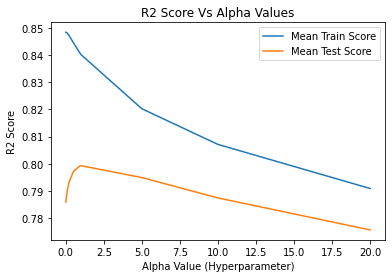

In [102]:
# Plotting alpha with r2 score
plt.plot(ridge_cv_results_df.param_alpha, ridge_cv_results_df.mean_train_score)
plt.plot(ridge_cv_results_df.param_alpha, ridge_cv_results_df.mean_test_score)
plt.xlabel('Alpha Value (Hyperparameter)')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha Values")
plt.legend(['Mean Train Score', 'Mean Test Score'], loc='best')
plt.show()

### Re-build Model with Best Alpha Value

In [103]:
# Create Ridge model
ridge_model_best = Ridge(alpha=1.0)
ridge_model_best.fit(X_train, y_train)

Ridge()

In [104]:
# Get prediction for train set
y_train_pred = ridge_model_best.predict(X_train)
ridge_best_score_train = r2_score(y_train, y_train_pred)
ridge_best_score_train

0.8381852054530545

In [105]:
# Get prediction for test set
y_test_pred  = ridge_model_best.predict(X_test)
ridge_best_score_test = r2_score(y_test, y_test_pred)
ridge_best_score_test

0.8237609465069815

In [106]:
# RSME
mean_squared_error(y_test, y_test_pred)

0.2007824839510879

### Residual Analysis of the train data

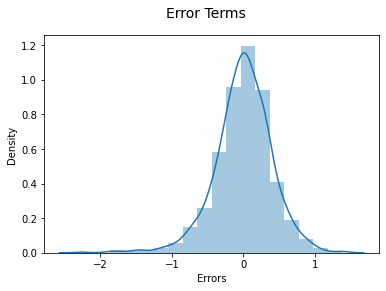

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Model Evaluation

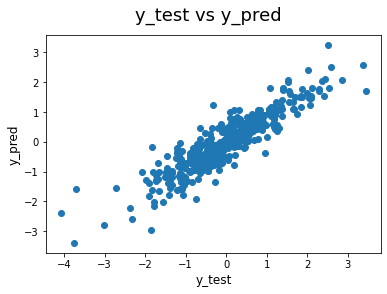

In [108]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 18)  
# X-label
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_pred', fontsize = 12)      
plt.show()

In [109]:
# View top 10 predictors
model_parameter = list(ridge_model_best.coef_)
model_parameter.insert(0, ridge_model_best.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coefficent = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coefficent.columns = ['Feature','Coefficent']
ridge_coefficent.sort_values(by='Coefficent', ascending=False).head(10)

,Feature,Coefficent
7,BedroomAbvGr,0.948339
6,GrLivArea,0.628747
13,GarageAge,0.620505
5,LowQualFinSF,0.568562
11,MiscVal,0.567617
12,BuildingAge,0.552093
35,Alley_None,0.500850
1,LotArea,0.493901
10,GarageArea,0.483893
21,MSSubClass_30,0.477335


## Option 3: Build Model using ElasticNet

In [110]:
# Alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [111]:
# Get best alpha
for alpha in alphas:
    model = ElasticNet(alpha=alpha).fit(X_train, y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(alpha, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.84, MSE:0.16, RMSE:0.39
Alpha:0.0010, R2:0.83, MSE:0.17, RMSE:0.41
Alpha:0.0100, R2:0.79, MSE:0.21, RMSE:0.46
Alpha:0.1000, R2:0.63, MSE:0.37, RMSE:0.61
Alpha:0.3000, R2:0.50, MSE:0.50, RMSE:0.71
Alpha:0.5000, R2:0.39, MSE:0.61, RMSE:0.78
Alpha:0.7000, R2:0.31, MSE:0.69, RMSE:0.83
Alpha:1.0000, R2:0.18, MSE:0.82, RMSE:0.91


In [112]:
# Find best alpha
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model_elastic_cv = elastic_cv.fit(X_train, y_train)
model_elastic_cv.alpha_

0.001

### Building Final Model

In [113]:
# ElasticNet model
model_elastic = ElasticNet(alpha=0.001).fit(X_train, y_train) 

In [114]:
# Get prediction for train set
y_train_pred = model_elastic.predict(X_train)
r2_score(y_train, y_train_pred)

0.834599059206549

In [115]:
# Get prediction for test set
y_test_pred  = model_elastic.predict(X_test)
r2_score(y_test, y_test_pred)

0.8225275422631058

### Residual Analysis of the train data

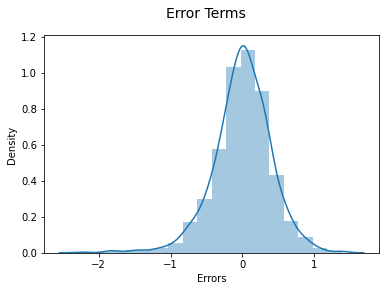

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Model Evaluation

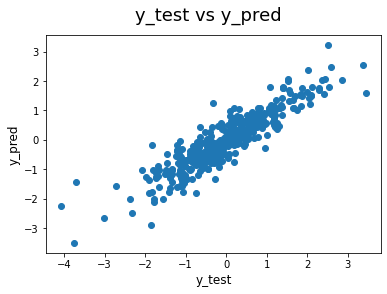

In [117]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 18)  
# X-label
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_pred', fontsize = 12)      
plt.show()

## Subjective Questions

### Question 1

Optimal value of alpha for LASSO is `0.001`, let's see the results after doubling the optimal value i.e. `alpha=0.002`

In [118]:
# Build model with doubled parameter
lasso_model_double = Lasso(alpha=0.002)
lasso_model_double.fit(X_train, y_train)

Lasso(alpha=0.002)

In [119]:
# Get prediction for train set
y_train_pred = lasso_model_double.predict(X_train)
lasso_score_train_double = r2_score(y_train, y_train_pred)
lasso_score_train_double

0.81934728447135

In [120]:
# Difffence in train score
round(lasso_best_score_train - lasso_score_train_double, 4)

0.01

In [121]:
# Get prediction for test set
y_test_pred  = lasso_model_double.predict(X_test)
lasso_score_test_double = r2_score(y_test, y_test_pred)
lasso_score_test_double

0.817946240044001

In [122]:
# Difffence in train score
round(lasso_best_score_test - lasso_score_test_double, 4)

-0.0013

In [123]:
# View top 10 predictors
model_parameter_best = list(lasso_model_best.coef_)
model_parameter_best.insert(0, lasso_model_best.intercept_)
model_parameter_doubled = list(lasso_model_double.coef_)
model_parameter_doubled.insert(0, lasso_model_double.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coefficent = pd.DataFrame(list(zip(cols,model_parameter_best, model_parameter_doubled)))
ridge_coefficent.columns = ['Feature','CoefficentBest', 'CoefficentDoubled']
ridge_coefficent.sort_values(by=['CoefficentBest','CoefficentDoubled'], ascending=False).head(12)

,Feature,CoefficentBest,CoefficentDoubled
7,BedroomAbvGr,0.611126,0.482934
11,MiscVal,0.559628,0.569163
12,BuildingAge,0.521722,0.452623
1,LotArea,0.491968,0.487848
10,GarageArea,0.469029,0.495471
13,GarageAge,0.457013,0.305154
32,MSZoning_RH,0.451015,0.441104
6,GrLivArea,0.286974,0.058207
35,Alley_None,0.257479,0.247052
5,LowQualFinSF,0.218984,0.056043


Optimal value of alpha for RIDGE is `1.0`, let's see the results after doubling the optimal value i.e. `alpha=2.0`

In [124]:
# Create Ridge model with doubled alpha value
ridge_model_double = Ridge(alpha=2.0)
ridge_model_double.fit(X_train, y_train)

Ridge(alpha=2.0)

In [125]:
# Get prediction for train set
y_train_pred = ridge_model_double.predict(X_train)
ridge_score_train_double = r2_score(y_train, y_train_pred)
ridge_score_train_double

0.8321989956549581

In [126]:
# Difffence in train score
round(ridge_best_score_train - ridge_score_train_double, 4)

0.006

In [127]:
# Get prediction for test set
y_test_pred  = ridge_model_double.predict(X_test)
ridge_score_test_double = r2_score(y_test, y_test_pred)
ridge_score_test_double

0.8244914993249973

In [128]:
# Difffence in train score
round(ridge_best_score_test - ridge_score_test_double, 4)

-0.0007

In [129]:
# View top 10 predictors
model_parameter_best = list(ridge_model_best.coef_)
model_parameter_best.insert(0, ridge_model_best.intercept_)
model_parameter_doubled = list(ridge_model_double.coef_)
model_parameter_doubled.insert(0, ridge_model_double.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coefficent = pd.DataFrame(list(zip(cols,model_parameter_best, model_parameter_doubled)))
ridge_coefficent.columns = ['Feature','CoefficentBest', 'CoefficentDoubled']
ridge_coefficent.sort_values(by=['CoefficentBest','CoefficentDoubled'], ascending=False).head(12)

,Feature,CoefficentBest,CoefficentDoubled
7,BedroomAbvGr,0.948339,0.764795
6,GrLivArea,0.628747,0.422659
13,GarageAge,0.620505,0.546731
5,LowQualFinSF,0.568562,0.392612
11,MiscVal,0.567617,0.556506
12,BuildingAge,0.552093,0.523327
35,Alley_None,0.500850,0.407977
1,LotArea,0.493901,0.492409
10,GarageArea,0.483893,0.502956
21,MSSubClass_30,0.477335,0.287110


__Conclusion__: Not much significant reduction in train and test scores however additional penality added to coeffients when optimal alpha values are doubled.

### Question 3

Dropping common top 5 features, and re-building model

In [130]:
# Check shape of train and test set
print(df_train.shape)
print(df_test.shape)

(982, 276)
(422, 276)


In [131]:
# Drop features from train and test set
df_train.drop(columns=['BedroomAbvGr', 'MiscVal', 'BuildingAge', 'GrLivArea', 'GarageAge'], axis=1, inplace=True)
df_test.drop(columns=['BedroomAbvGr', 'MiscVal', 'BuildingAge', 'GrLivArea', 'GarageAge'], axis=1, inplace=True)
print(df_train.shape)
print(df_test.shape)

(982, 271)
(422, 271)


In [132]:
# Update train and test predictors
X_train = df_train
X_test = df_test
print(X_train.shape)
print(X_test.shape)

(982, 271)
(422, 271)


In [133]:
# Define estimator
lm = LinearRegression()

In [134]:
# Fit model
lm.fit(X_train, y_train)

LinearRegression()

In [135]:
# Running RFE - 50 features
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [136]:
# View selected features
rfe_features = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_features.columns = ['Features','Status','Ranking']
rfe_features.sort_values(by='Ranking', ascending=True).head(51)

,Features,Status,Ranking
253,SaleType_ConLw,True,1
184,Heating_Wall,True,1
183,Heating_OthW,True,1
43,LandSlope_Sev,True,1
180,Heating_GasA,True,1
177,BsmtFinType2_None,True,1
171,BsmtFinType1_None,True,1
162,BsmtCond_Po,True,1
161,BsmtCond_None,True,1
159,BsmtQual_TA,True,1


### Find best alpha LASSO regression

In [137]:
# Create list of alpha values
hyper_param = {'alpha':[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}

# Create model
model_lasso = Lasso()
model_cv_lasso = GridSearchCV(estimator = model_lasso, 
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv_lasso.fit(X_train, y_train)

# Checking the best parameter (Alpha Value)
model_cv_lasso.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'alpha': 0.001}

### Re-build Model with Best Alpha Value

In [138]:
# Build model with best parameter
lasso_model_best_red = Lasso(alpha=0.001)
lasso_model_best_red.fit(X_train, y_train)

Lasso(alpha=0.001)

In [139]:
# Get prediction for train set
y_train_pred = lasso_model_best_red.predict(X_train)
lasso_best_score_train = r2_score(y_train, y_train_pred)
lasso_best_score_train

0.9329280350212137

In [140]:
# Get prediction for test set
y_test_pred  = lasso_model_best_red.predict(X_test)
lasso_best_score_test = r2_score(y_test, y_test_pred)
lasso_best_score_test

0.8886285744398544

In [141]:
# View top 10 predictors
model_parameter = list(lasso_model_best_red.coef_)
model_parameter.insert(0, lasso_model_best_red.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coefficent = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coefficent.columns = ['Feature','Coefficent']
ridge_coefficent.sort_values(by='Coefficent', ascending=False).head(10)

,Feature,Coefficent
255,SaleType_Oth,0.322867
50,Neighborhood_Edwards,0.319734
11,TotalPorchSF,0.275205
66,Neighborhood_Timber,0.266636
267,TotalBathrooms_4.0,0.257089
5,LowQualFinSF,0.233813
3,MasVnrArea,0.216922
261,SaleCondition_Partial,0.211402
115,Exterior1st_CBlock,0.192024
268,TotalBathrooms_4.5,0.187685


### Find best alpha RIDGE regression

In [142]:
# Create list of alpha values
hyper_param = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]}

# Create model
model_ridge = Ridge()
model_cv_ridge = GridSearchCV(estimator=model_ridge,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv_ridge.fit(X_train, y_train)

# Checking the best parameter(Alpha Value)
model_cv_ridge.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 10.0}

### Re-build Model with Best Alpha Value

In [143]:
# Create Ridge model
ridge_model_best_red = Ridge(alpha=10.0)
ridge_model_best_red.fit(X_train, y_train)

Ridge(alpha=10.0)

In [144]:
# Get prediction for train set
y_train_pred = ridge_model_best_red.predict(X_train)
lasso_best_score_train = r2_score(y_train, y_train_pred)
lasso_best_score_train

0.9304360427014714

In [145]:
# Get prediction for test set
y_test_pred  = ridge_model_best_red.predict(X_test)
lasso_best_score_test = r2_score(y_test, y_test_pred)
lasso_best_score_test

0.8884114489780846

In [146]:
# View top 10 predictors
model_parameter = list(ridge_model_best_red.coef_)
model_parameter.insert(0, ridge_model_best_red.intercept_)
cols = df_train.columns
cols.insert(0, 'constant')
ridge_coefficent = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coefficent.columns = ['Feature','Coefficent']
ridge_coefficent.sort_values(by='Coefficent', ascending=False).head(10)

,Feature,Coefficent
11,TotalPorchSF,0.258870
50,Neighborhood_Edwards,0.242338
267,TotalBathrooms_4.0,0.233052
5,LowQualFinSF,0.223864
3,MasVnrArea,0.209721
78,Condition2_PosA,0.208137
261,SaleCondition_Partial,0.200376
66,Neighborhood_Timber,0.198608
266,TotalBathrooms_3.5,0.168757
29,MSZoning_RM,0.166658


## ElasticNet

In [147]:
# Find best alpha
elastic_cv_red = ElasticNetCV(alphas=alphas, cv=5)
model_elastic_cv_red = elastic_cv_red.fit(X_train, y_train)
model_elastic_cv_red.alpha_

0.001

In [148]:
# ElasticNet model
model_elastic_red = ElasticNet(alpha=0.001).fit(X_train, y_train) 

In [149]:
# Get prediction for train set
y_train_pred = model_elastic_red.predict(X_train)
r2_score(y_train, y_train_pred)

0.9388871183849259

In [150]:
# Get prediction for test set
y_test_pred  = model_elastic_red.predict(X_test)
r2_score(y_test, y_test_pred)

0.8885587495499361